x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples

テストデータの一部を可視化


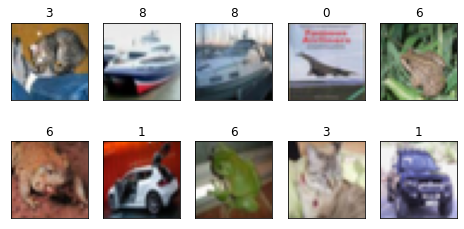


CNNモデルの構成
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15,

In [ ]:
'''
CIFAR10画像データセットによるCNNの訓練
'''

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt

batch_size = 32
num_classes = 10
epochs = 75

# 訓練データとテストデータの読み込み
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print()

# テストデータの一部を可視化
print('テストデータの一部を可視化')
fig = plt.figure(figsize=(8,4))
for c, (image, label) in enumerate(zip(x_test[:10], y_test[:10])):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % label)
    subplot.imshow(image)
plt.show()
print()

# 教師データを one-hot encoding にする
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# CNN（畳み込みニューラルネットワーク）を構成
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
print('CNNモデルの構成')
model.summary()
print()

# RMSprop 最適化器を初期化
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# モデルを訓練
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('CNNモデルを訓練')
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
print()

# 訓練済みモデルを保存
model.save('keras_cifar10_trained_model.hdf5')

# 訓練済みモデルの評価
print('誤差と精度を評価')
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



10000 test samples

CNNモデルの構成
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)      

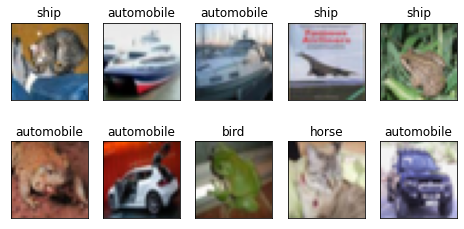

In [ ]:
'''
学習モデルの読み込み
'''
import keras
from keras.models import load_model
from keras.datasets import cifar10

num_classes = 10

# 訓練データとテストデータの読み込み
(_x_train, _y_train), (x_test, y_test) = cifar10.load_data()
print(x_test.shape[0], 'test samples')
print()

# 教師データを one-hot encoding にする
y_test = keras.utils.to_categorical(y_test, num_classes)

# 訓練済みモデルを読み込み
model = load_model('keras_cifar10_trained_model.hdf5')

print('CNNモデルの構成')
model.summary()
print()

# 予測精度の評価
print('誤差と精度を評価')
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
print()

# テストデータの一部と予測ラベルを表示
print('テストデータの一部と予測ラベルを表示')
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(figsize=(8,4))
for c, (image, label_num) in enumerate(zip(x_test[:10], model.predict(x_test[:10]))):
    subplot = fig.add_subplot(2,5,c+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%s' % label[label_num.argmax()])
    subplot.imshow(image)
plt.show()


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving dog.jpg to dog (2).jpg
User uploaded file "dog.jpg" with length 6733 bytes


読み込んだ画像


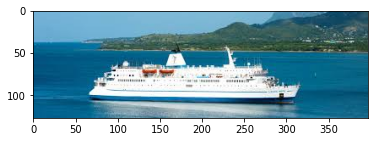


(127, 397, 3)

リサイズした画像


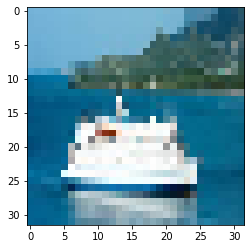


予測出力 =  [[9.6072862e-03 2.4007463e-03 5.6622259e-04 5.2479765e-04 1.9266803e-04
  2.4949934e-04 2.4501263e-04 6.5625424e-04 9.8213756e-01 3.4198742e-03]]
画像クラス =  ship


In [ ]:
# 画像の読み込みとリサイズ
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('ship.jpg', flags=cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
print('読み込んだ画像')
plt.show()
print()

print(img.shape)
print()

print('リサイズした画像')
img = cv2.resize(img, (32,32))
plt.imshow(img)
plt.show()
print()

input = img.reshape(1, 32, 32, 3)
input = input.astype('float32')
input /= 255

# 学習済みモデルの読み込み
from keras.models import load_model
model = load_model('keras_cifar10_trained_model.hdf5')

# 画像クラスの予測
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
pred = model.predict(input, verbose=0)
print('予測出力 = ', pred)
print('画像クラス = ', label[pred.argmax()])
